In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [16]:
#dataset: https://www.kaggle.com/karthickveerakumar/spam-filter
emails = pd.read_csv('emails.csv')
emails

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,Subject: naturally irresistible your corporate...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,Subject: re : research and development charges...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5726,"Subject: re : receipts from visit jim , than...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5727,Subject: re : enron case study update wow ! a...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5728,"Subject: re : interest david , please , call...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Columns: 110 entries, text to Unnamed: 109
dtypes: float64(1), object(109)
memory usage: 4.8+ MB


In [7]:
emails = emails.drop_duplicates(keep = 'last') #remove all duplicate emails from the dataframe
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


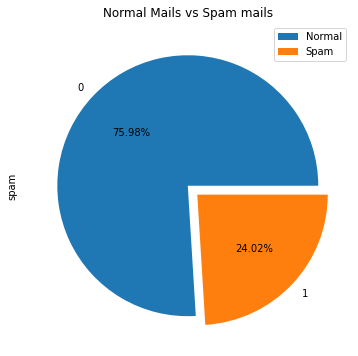

In [8]:
#data visualization using matplotlib
emails.spam.value_counts().plot(kind='pie',
                                    explode=[0,.1],
                                    figsize=(6,6),
                                    autopct='%.2f%%')
plt.title('Normal Mails vs Spam mails')
plt.legend(['Normal','Spam'])
plt.show()

In [9]:
emails.spam.value_counts()

0    4327
1    1368
Name: spam, dtype: int64

In [10]:
# allocating data to the variables
spam_messages = emails[emails['spam']==1]['text']
notspam_messages = emails[emails['spam']==0]['text']

In [11]:
spam_words = []
notspam_words = []

In [12]:
#creating a function for tokenizing the text using nltk
def tokenize_spam_words(text):
    words = [w.lower() for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.lower().isalpha()]
    spam_words.extend(words)

def tokenize_notspam_words(text):
    words = [w.lower() for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.lower().isalpha()]
    notspam_words.extend(words)

In [13]:
#tokenizing the spam messages
spam_messages.apply(tokenize_spam_words)
print(spam_words[:100])

['subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [14]:
#tokenizing the not spam messages
notspam_messages.apply(tokenize_notspam_words)
print(notspam_words[:100])

['subject', 'hello', 'guys', 'bugging', 'completed', 'questionnaire', 'one', 'page', 'bio', 'statement', 'thoughts', 'business', 'edu', 'new', 'economy', 'records', 'incorrect', 'please', 'ship', 'responses', 'want', 'put', 'everything', 'together', 'next', 'week', 'ship', 'back', 'everyone', 'questionnaire', 'attached', 'well', 'copies', 'bio', 'pages', 'michael', 'froehls', 'two', 'somewhat', 'different', 'approaches', 'idea', 'latter', 'introduce', 'panelists', 'give', 'background', 'approaching', 'issues', 'discuss', 'also', 'provide', 'copies', 'attendees', 'use', 'material', 'personal', 'introductions', 'opening', 'panel', 'discussions', 'thanks', 'look', 'forward', 'seeing', 'two', 'weeks', 'john', 'waco', 'background', 'mf', 'doc', 'jmartinbiosketch', 'doc', 'questionnaire', 'doc', 'john', 'martin', 'carr', 'p', 'collins', 'chair', 'finance', 'finance', 'department', 'baylor', 'university', 'po', 'box', 'waco', 'tx', 'office', 'fax', 'j', 'martin', 'baylor', 'edu', 'web', 'http

In [15]:
#stemming 
from nltk.stem import PorterStemmer

In [16]:
stemmer = PorterStemmer()

In [17]:
# creating a function for stemming the words
def cleanup_text(message):
    message = message.translate(str.maketrans('','',string.punctuation))
    words = [stemmer.stem(w) for w in message.split() if w.lower() not in stopwords.words('english') ]
    return ' '.join(words) 

In [18]:
emails.text = emails.text.apply(cleanup_text)

C:\Users\krish\AppData\Local\Temp\ipykernel_19624\4217212453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails.text = emails.text.apply(cleanup_text)


In [19]:
emails.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1


In [20]:
#feautre extraction using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words = 'english')

In [21]:
features = vect.fit_transform(emails.text)
features.shape

(5695, 29096)

In [22]:
# saving the feautures using the pickle
import pickle

with open('count_vectorizer.pkl','wb') as f:
    pickle.dump(vect,f)
print('done')

done


In [23]:
# data preprocessing for training the model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [24]:
#labeling the data
category =  LabelEncoder()
emails.spam = category.fit_transform(emails.spam)
emails.head()

C:\Users\krish\AppData\Local\Temp\ipykernel_19624\563392934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails.spam = category.fit_transform(emails.spam)


,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1


In [25]:
#splitting the data into training and testing data
x_train, x_test, y_train,y_test = train_test_split(features.toarray(), emails.spam,test_size=.2)

In [26]:
#creating a machine learning model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [27]:
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [39]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[835,  16],
       [ 37, 251]], dtype=int64)

In [35]:
#saving the builded model using pickle
import pickle
with open('spam_classifier.pkl','wb') as f:
    pickle.dump(model,f)
print('done')

done
